In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('../data/processed/bank_churn_clean.csv')

# Balance por producto
df['BalancePerProduct'] = df['Balance'] / (df['NumOfProducts'] + 1)

# Ratio salario/balance
df['SalaryBalanceRatio'] = df['EstimatedSalary'] / (df['Balance'] + 1)

# Cliente de alto valor (tenure alto + balance alto)
df['HighValueCustomer'] = ((df['Tenure'] >= 5) & (df['Balance'] > 100000)).astype(int)

# Edad agrupada
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 30, 40, 50, 100], labels=['Young', 'Middle', 'Senior', 'Elder'])
df = pd.get_dummies(df, columns=['AgeGroup'], drop_first=True)


In [14]:
print(df.head())

   CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619       0   42       2       0.00              1          1   
1          608       0   41       1   83807.86              1          0   
2          502       0   42       8  159660.80              3          1   
3          699       0   39       1       0.00              2          0   
4          850       0   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  ...  Geography_Spain  \
0               1        101348.88       1  ...            False   
1               1        112542.58       0  ...             True   
2               0        113931.57       1  ...            False   
3               0         93826.63       0  ...            False   
4               1         79084.10       0  ...             True   

   BalancePerProduct  SalaryBalanceRatio  HighValueCustomer  AgeGroup_Middle  \
0               0.00       101348.880000              

Correlación con Churn:
 Exited                1.000000
Complain              0.995693
Age                   0.285296
AgeGroup_Elder        0.228840
AgeGroup_Senior       0.185364
Geography_Germany     0.173313
Balance               0.118577
BalancePerProduct     0.109964
HighValueCustomer     0.070873
EstimatedSalary       0.012490
CardType_PLATINUM    -0.000276
CardType_SILVER      -0.003834
Point Earned         -0.004628
Satisfaction Score   -0.005849
HasCrCard            -0.006976
Tenure               -0.013656
CardType_GOLD        -0.015995
CreditScore          -0.026771
NumOfProducts        -0.047611
Geography_Spain      -0.052800
SalaryBalanceRatio   -0.093063
Gender               -0.106267
IsActiveMember       -0.156356
AgeGroup_Middle      -0.183879
Name: Exited, dtype: float64


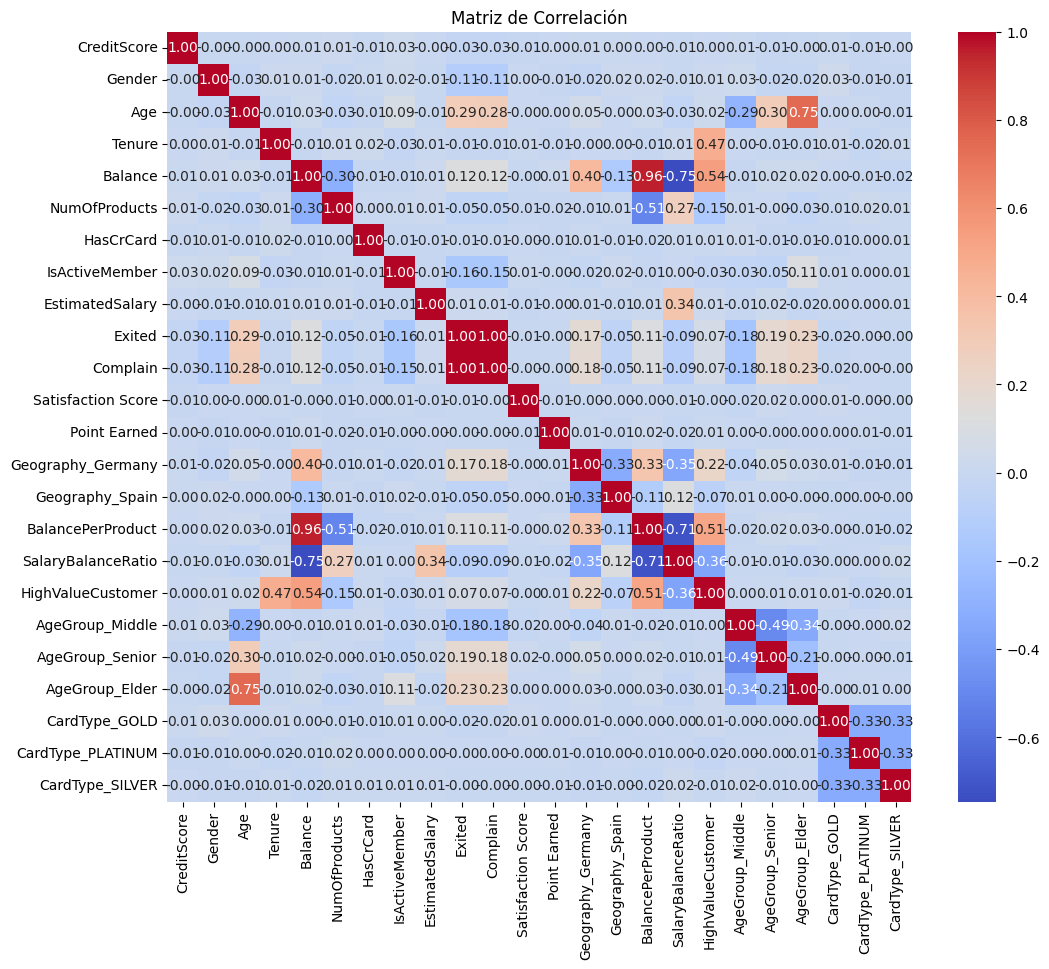

In [ ]:
# Matriz de correlación
plt.figure(figsize=(12, 10))
correlation = df.corr(numeric_only=True)  # ← Agregar numery_only=true parámetro evita la advertencia
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.savefig('../reports/figures/correlation_matrix.png', dpi=300, bbox_inches='tight')

# Correlación con variable objetivo
churn_corr = correlation['Exited'].sort_values(ascending=False)
print("Correlación con Churn:\n", churn_corr)

